In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## You are given 3 datasets df1, df2 and df3 with x,y as features and z as a class.

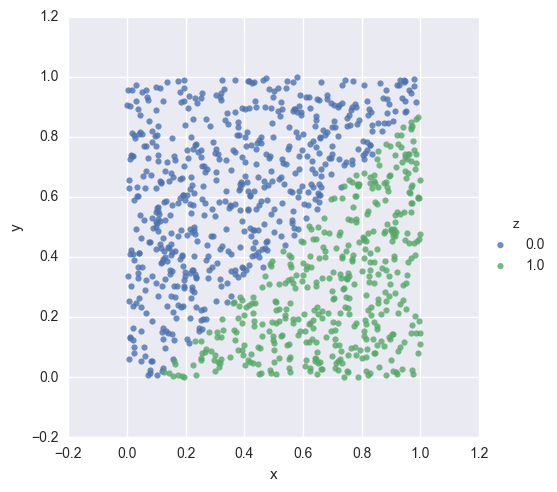

In [29]:
df1 = pd.DataFrame(index=range(1000), columns=["x", "y", "z"])
df1["x"] = np.random.rand(1000)
df1["y"] = np.random.rand(1000)
df1["z"] = np.array(
    [1.0 if i > (j + 0.1) else 0.0 for (i, j) in zip(df1.x, df1.y)])
sns.lmplot(x="x", y="y", data=df1, hue='z', fit_reg=False)

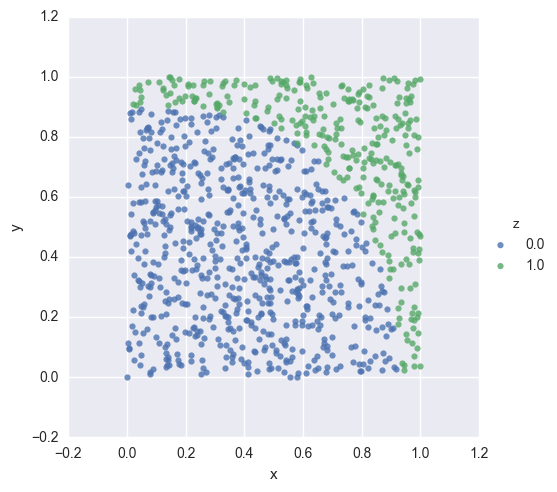

In [3]:
df2 = pd.DataFrame(index=range(1000), columns=["x", "y", "z"])
df2["x"] = np.random.rand(1000)
df2["y"] = np.random.rand(1000)
df2["z"] = np.array(
    [1.0 if i**3 + j**2 > 0.8 else 0.0 for (i, j) in zip(df2.x, df2.y)])
sns.lmplot(x="x", y="y", data=df2, hue='z', fit_reg=False)

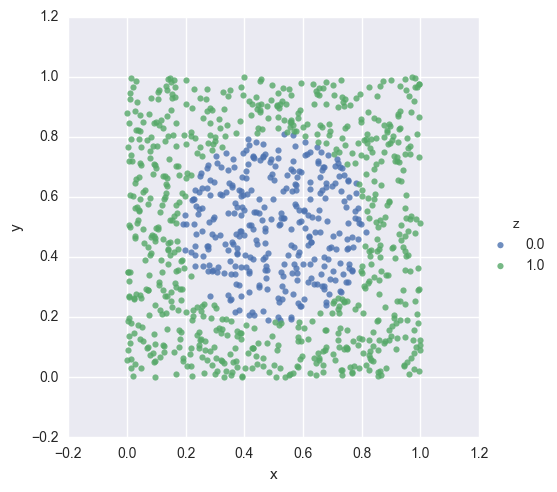

In [4]:
df3 = pd.DataFrame(index=range(1000), columns=["x", "y", "z"])
df3["x"] = np.random.rand(1000)
df3["y"] = np.random.rand(1000)
df3["z"] = np.array([1.0 if ((i-0.5)**2 + (j-0.5)**2) >
                     0.1 else 0.0 for (i, j) in zip(df3.x, df3.y)])
sns.lmplot(x="x", y="y", data=df3, hue='z', fit_reg=False)

### 1) Apply SVM with different kernels to given datasets and visualize the results. In your visualizations, show the areas in the plane that get classified to a certain class (see http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py).

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
# Df to store accuracy scores
results = pd.DataFrame(columns=['linear', 'poly', 'rbf'])


def pltdr(df, kern, name):  # The function takes dataframe, kernel and name of the dataset as parameters
    svm = SVC(kernel=kern)  # Initializing the classifier
    X = df.drop('z', axis=1).values
    y = df['z'].values.astype(np.integer)
    '''We stratify by y to keep proportions in train/test split'''
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.5, stratify=y)
    svm.fit(X_train, y_train)  # Fit training part to the classifier
    plt.figure(figsize=(7, 7))  # Setting size of the plot
    '''This function plot decision regions of a given classifer'''
    plot_decision_regions(
        X, y, clf=svm)  # Note that the classifier was trained only on train part, but I plot all datapoints
    y_pred = svm.predict(X_test)
    # Calculating accuracy of given classifer
    acc = accuracy_score(y_test, y_pred)
    results.set_value(name, kern, acc)
    tt = 'SVM on ' + name + ' datset with kernel=' + \\n        kern + '. Accuracy is ' + str(acc)
    plt.title(tt)  # Plotting previously constructed title
    axes = plt.gca()  # I limited the axis, so the plot would look nicer
    axes.set_xlim([-0.2, 1.2])
    axes.set_ylim([-0.2, 1.2])
    plt.show()

## I will apply 3 types of kernel to each dataset: 'linear', 'poly' and 'rbf'

### First dataset:

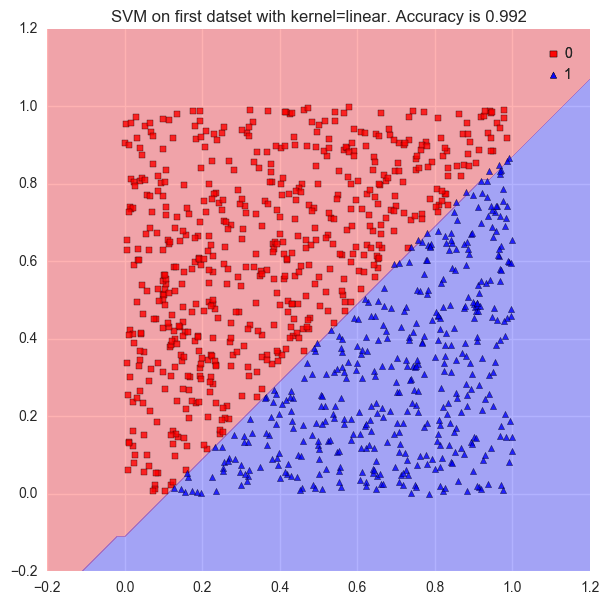

In [30]:
pltdr(df1, 'linear', 'first')

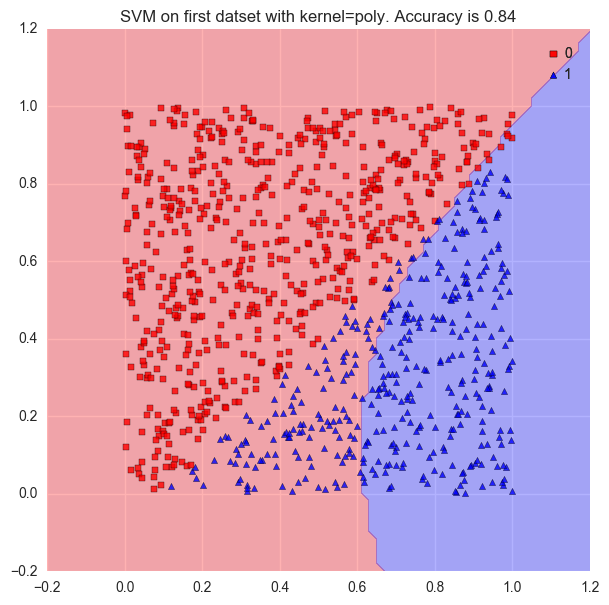

In [11]:
pltdr(df1, 'poly', 'first')

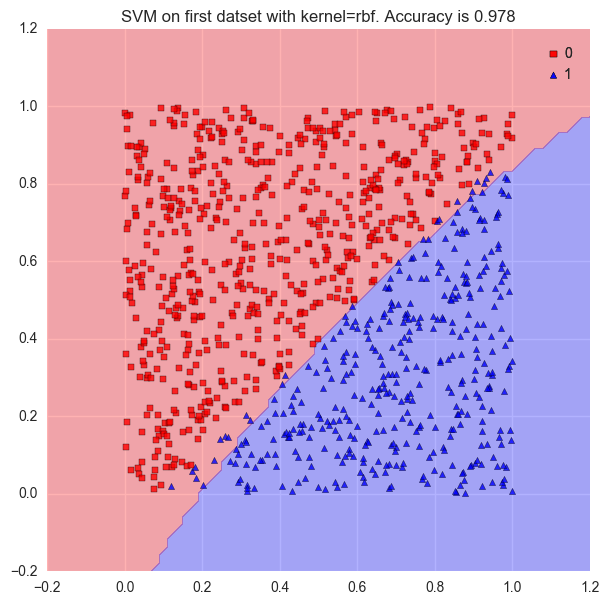

In [12]:
pltdr(df1, 'rbf', 'first')

### Second dataset: 

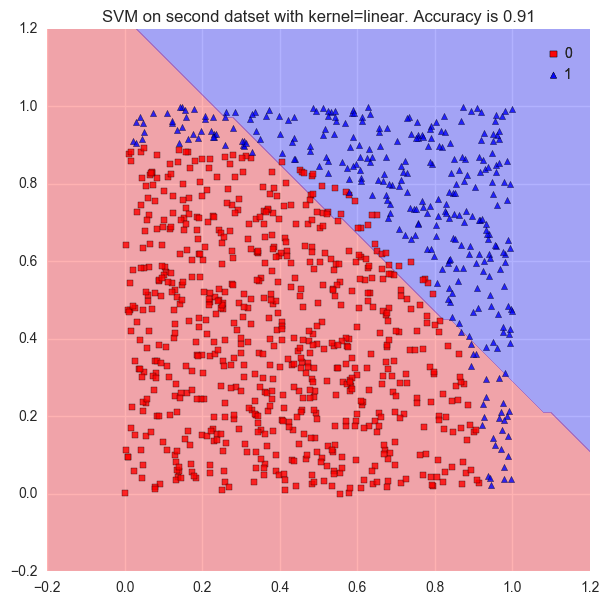

In [13]:
pltdr(df2, 'linear', 'second')

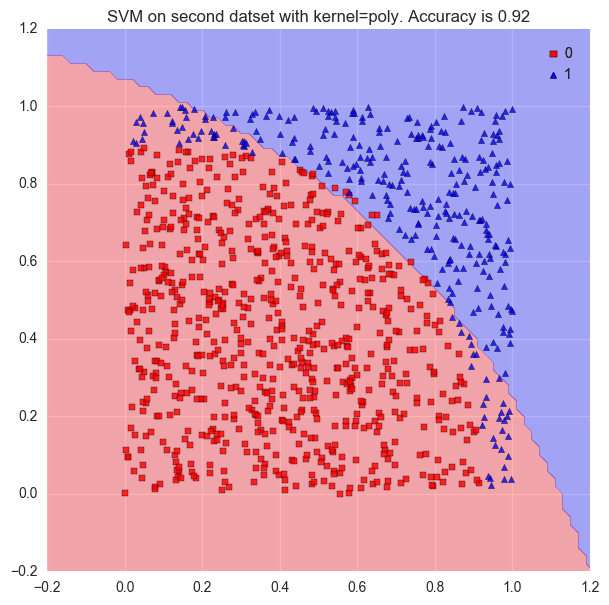

In [14]:
pltdr(df2, 'poly', 'second')

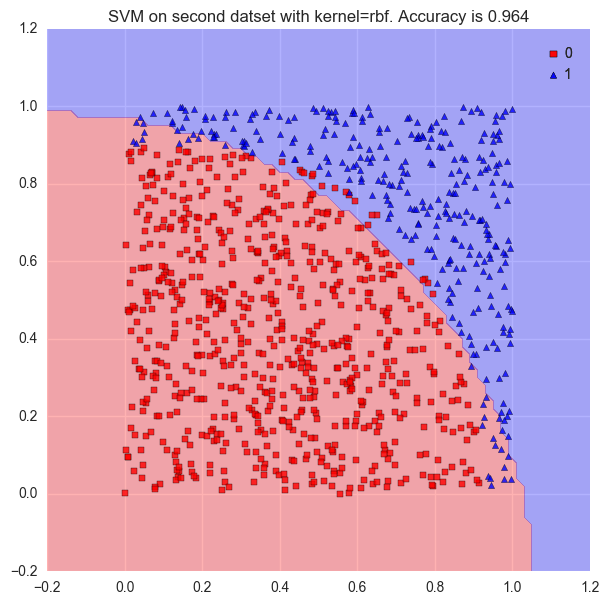

In [15]:
pltdr(df2, 'rbf', 'second')

### Third dataset:

### 66% of all datapoints ar blue, so in this case SVM with linear kernel decided to assign all datapoints to blue class

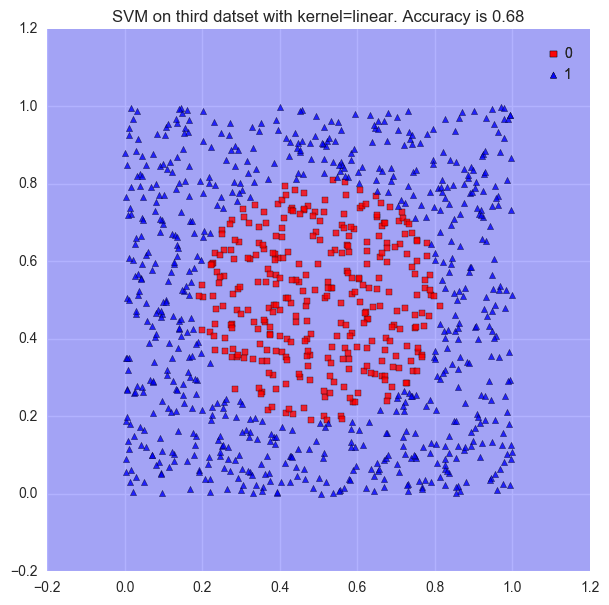

In [16]:
pltdr(df3, 'linear', 'third')

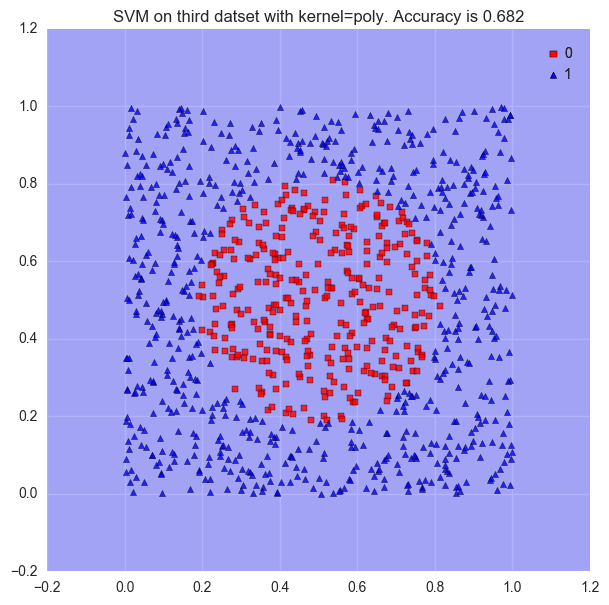

In [17]:
pltdr(df3, 'poly', 'third')

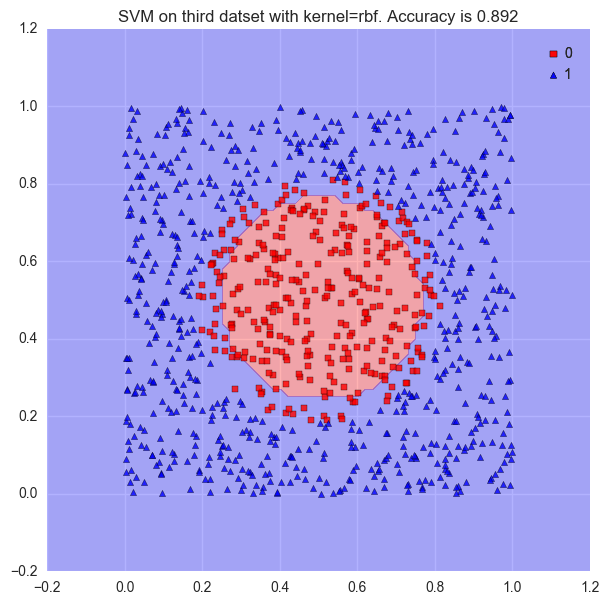

In [18]:
pltdr(df3, 'rbf', 'third')

### 2) Compare accuracy of the results and choose the best fitting kernel for each dataset.

## Here are accuracy scores for all combinations:

In [19]:
results

,linear,poly,rbf
first,0.97,0.84,0.978
second,0.91,0.92,0.964
third,0.68,0.682,0.892


## Given the table above it is easy to find the best fitting kernell:
**1. First dataset (df1) is best fitted by rbf kernell, even though perfomance of the linear kernell is also good. <br>**
**2. Second dataset (df2) best fitted by rbf kernell, and poly kernell is second best with only 2% gap. <br>**
**3. Third dataset (df3) also best fitted by rbf kernell. Other two kernels didn't even outperform the baseline.  <br>**

### 3) Explain (in words) for each dataset why a specific kernel perform best.

## Bonus: GridSearch

### In second dataset the 'poly' kernel is only 2% away from reaching the perfomance of 'rbf' kernel. Let's see whether we can improve the accuracy of this two kernels by playing around with hyperparameters.

In [20]:
from sklearn.model_selection import GridSearchCV

gcl = SVC()  # Classifier

# Parameters that we will be testing
parameters = {'kernel': ['poly', 'rbf'], 'C': [0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(estimator=gcl, param_grid=parameters, cv=3)

grid.fit(df2.drop('z', axis=1).values, df2['z'].values)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['poly', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
grid.grid_scores_

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86100, std: 0.00389, params: {'C': 0.1, 'kernel': 'poly'},
 mean: 0.90800, std: 0.01432, params: {'C': 0.1, 'kernel': 'rbf'},
 mean: 0.92400, std: 0.01596, params: {'C': 1, 'kernel': 'poly'},
 mean: 0.95400, std: 0.02193, params: {'C': 1, 'kernel': 'rbf'},
 mean: 0.98200, std: 0.00880, params: {'C': 10, 'kernel': 'poly'},
 mean: 0.98400, std: 0.01017, params: {'C': 10, 'kernel': 'rbf'},
 mean: 0.98600, std: 0.01155, params: {'C': 100, 'kernel': 'poly'},
 mean: 0.99700, std: 0.00244, params: {'C': 100, 'kernel': 'rbf'},
 mean: 0.99600, std: 0.00373, params: {'C': 1000, 'kernel': 'poly'},
 mean: 0.99900, std: 0.00142, params: {'C': 1000, 'kernel': 'rbf'}]

## As you can see the 'poly' kernel outperforms 'rbf' kernel by a small margin with high values of parameter C

In [22]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

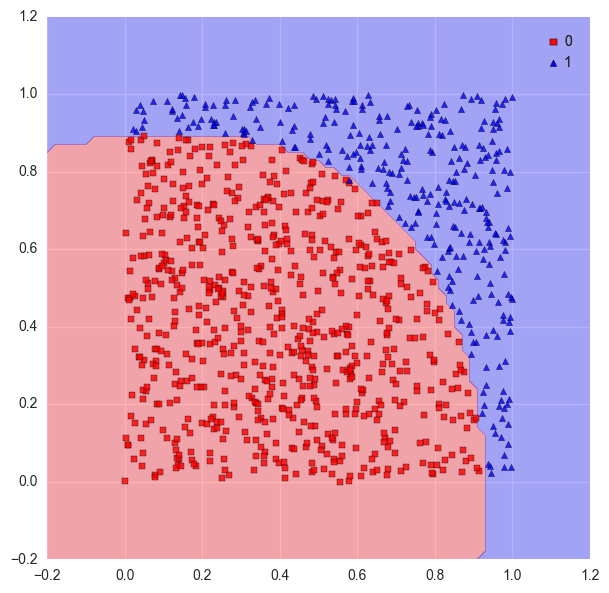

In [23]:
plt.figure(figsize=(7, 7))
plot_decision_regions(df2.drop('z', axis=1).values, df2['z'].values.astype(
    np.integer), clf=grid.best_estimator_)
axes = plt.gca()
axes.set_xlim([-0.2, 1.2])
axes.set_ylim([-0.2, 1.2])
plt.show()

In [24]:
# Another way of getting the results of grid search
pd.DataFrame(grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_kernel,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007003,0.002669,0.861,0.863997,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",10,0.865269,0.857357,0.861862,0.857571,0.855856,0.877061,0.002831,1.701405e-03,0.003892,0.009239
1,0.005208,0.005209,0.908,0.908501,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",9,0.901198,0.909910,0.927928,0.901049,0.894895,0.914543,0.007366,7.366707e-03,0.014314,0.005598
2,0.010417,0.000000,0.924,0.931498,1,poly,"{'C': 1, 'kernel': 'poly'}",8,0.925150,0.927928,0.942943,0.931034,0.903904,0.935532,0.007366,0.000000e+00,0.015950,0.003122
3,0.000000,0.000000,0.954,0.961499,1,rbf,"{'C': 1, 'kernel': 'rbf'}",7,0.937126,0.959459,0.984985,0.967016,0.939940,0.958021,0.000000,0.000000e+00,0.021923,0.003945
4,0.000000,0.005208,0.982,0.984499,10,poly,"{'C': 10, 'kernel': 'poly'}",6,0.970060,0.983483,0.990991,0.992504,0.984985,0.977511,0.000000,7.365696e-03,0.008804,0.006163
5,0.010417,0.000000,0.984,0.989498,10,rbf,"{'C': 10, 'kernel': 'rbf'}",5,0.970060,0.984985,0.993994,0.994003,0.987988,0.989505,0.007366,0.000000e+00,0.010172,0.003682
6,0.005209,0.000000,0.986,0.996498,100,poly,"{'C': 100, 'kernel': 'poly'}",4,0.970060,0.992492,0.990991,1.000000,0.996997,0.997001,0.007366,0.000000e+00,0.011551,0.003086
7,0.005209,0.000000,0.997,0.999499,100,rbf,"{'C': 100, 'kernel': 'rbf'}",2,0.994012,0.998498,0.996997,1.000000,1.000000,1.000000,0.007366,0.000000e+00,0.002445,0.000708
8,0.007901,0.000501,0.996,0.998499,1000,poly,"{'C': 1000, 'kernel': 'poly'}",3,0.991018,0.996997,0.996997,1.000000,1.000000,0.998501,0.006222,5.150430e-07,0.003735,0.001226
9,0.004334,0.000501,0.999,0.998499,1000,rbf,"{'C': 1000, 'kernel': 'rbf'}",1,1.000000,0.996997,0.996997,1.000000,1.000000,0.998501,0.000238,0.000000e+00,0.001415,0.001226
